In [163]:
from scipy.constants import c
import numpy as np
from numpy.lib import recfunctions as rec
from astropy.io          import fits
from astropy.coordinates import SkyCoord, Angle, search_around_sky
from astropy             import units as u
from astropy import cosmology
from matplotlib import pyplot as plt
import pandas as pd

In [164]:
clusters = fits.getdata("dr8_run_redmapper_v5.10_lgt20_catalog.fit")
clusters.shape

(27182,)

In [165]:
dt=clusters
df=pd.DataFrame.from_records(dt.tolist(), columns=dt.dtype.names)
pd.set_option('display.max_columns', 500)
df.head()

,MEM_MATCH_ID,RA,DEC,MODEL_MAG,MODEL_MAGERR,IMAG,IMAG_ERR,ZRED,ZRED_E,ZRED_CHISQ,BCG_SPEC_Z,Z_SPEC_INIT,Z_INIT,Z,LAMBDA_CHISQ,LAMBDA_CHISQ_E,LAMBDA_ZRED,LAMBDA_ZRED_E,R_LAMBDA,SCALEVAL,MASKFRAC,C_LAMBDA,C_LAMBDA_ERR,MAG_LAMBDA_ERR,CHISQ,Z_LAMBDA,Z_LAMBDA_E,EBV_MEAN,PHOTOID,LNLAMLIKE,LNBCGLIKE,LNLIKE,PZBINS,PZ,NCROSS,RMASK,RA_ORIG,DEC_ORIG,W,DLAMBDA_DZ,DLAMBDA_DZ2,DLAMBDAVAR_DZ,DLAMBDAVAR_DZ2,LAMBDA_CHISQ_C,LAMBDA_CHISQ_CE,NCENT,NCENT_GOOD,RA_CENT,DEC_CENT,ID_CENT,LAMBDA_CHISQ_CENT,ZLAMBDA_CENT,P_BCG,P_CEN,Q_CEN,P_FG,Q_MISS,P_SAT,P_C,BCG_ILUM,ILUM,Z_LAMBDA_RAW,Z_LAMBDA_E_RAW,LIM_EXPTIME,LIM_LIMMAG,LIM_LIMMAG_HARD
0,1,239.583329,27.233413,"[17.76729, 15.414802, 14.3970995, 13.97824, 13...","[0.049571823, 0.0037844528, 0.0027201786, 0.00...",13.979010,0.002698,0.098928,0.009839,17.784441,0.090807,0.090807,0.098928,0.100195,180.104446,4.361782,171.912521,4.388915,1.124877,1.011351,0.011557,"[1.9093423, 0.93780553, 0.41376486, 0.34006575]","[0.00497283, 0.00010319616, 6.815568e-05, 0.00...","[0.0049054394, 6.894528e-05, 3.42551e-05, 3.29...",15.773688,0.095777,0.005510,0.015627,39270301200850016,432.431091,3.524559,435.955658,"[0.065145, 0.06820817, 0.07127133, 0.0743345, ...","[1.3085691e-05, 0.0002135314, 0.0035602371, 0....",1,1.687315,239.583329,27.233413,1.094567,23.220964,-1341.603394,364.674957,7688.530762,179.612991,1.490858,5,2,"[239.5833290688836, 239.55540499547743, 239.60...","[27.233412917827273, 27.248122201838974, 27.22...","[24058604, 24058319, 24058603, 24058360, 24058...","[180.10445, 175.08556, 175.43642, 176.35172, 1...","[0.097549744, 0.097568356, 0.0, 0.0, 0.0]","[1.0, 1.0, 1.0, 1.0, 1.0]","[0.9020757, 0.09792038, 3.5944406e-06, 2.42353...","[0.81327194, 0.08828073, 3.2405903e-06, 2.1849...","[0.00061520457, 0.001319927, 0.0047987234, 0.0...",-5.677336,"[0.09730909, 0.9007597, 0.9951977, 0.99585867,...","[0.8920236, 0.472786, 3.2917105e-05, 2.2194863...",7.868203,124.580933,0.097550,0.001528,176.004425,21.013680,21.0
1,2,250.082548,46.711531,"[19.793066, 17.980946, 16.546164, 16.04907, 15...","[0.14495553, 0.014266385, 0.0069523766, 0.0072...",16.290333,0.007544,0.259850,0.011125,15.962359,-1.000000,-1.000000,0.259850,0.235314,202.636032,5.351595,185.886078,5.335467,1.151711,0.997195,0.000000,"[1.8020738, 1.3368812, 0.49752522, 0.3220247]","[0.117135584, 0.0015452786, 0.00054701546, 0.0...","[0.11574575, 0.0012177046, 0.00026885397, 0.00...",20.397034,0.232513,0.006079,0.026838,14530301500570247,388.690796,2.851013,391.541809,"[0.19676466, 0.2003395, 0.20391434, 0.20748918...","[5.877888e-07, 2.3193721e-05, 0.0007568323, 0....",1,1.727566,250.082548,46.711531,1.258363,7.363607,-274.338318,254.622787,-257.441864,202.636032,0.000000,5,1,"[250.08254838650885, 250.09854611178827, 250.0...","[46.71153135360437, 46.702837491811366, 46.712...","[3244506, 3244513, 3244508, 3244509, 3244521]","[202.63603, 0.0, 0.0, 0.0, 0.0]","[0.23102908, 0.0, 0.0, 0.0, 0.0]","[1.0, 1.0, 1.0, 1.0, 1.0]","[0.99687505, 0.0027111394, 0.00021671395, 0.00...","[0.9071869, 0.0024672202, 0.00019721634, 0.000...","[4.8254908e-05, 0.0038513897, 0.00023110678, 0...",-4.834431,"[0.0030766975, 0.99343747, 0.9995522, 0.984441...","[0.9097741, 0.026690971, 0.0021872465, 0.00198...",5.798855,135.304886,0.231029,0.002095,188898.015625,20.900002,21.0
2,3,197.872957,-1.341116,"[20.430338, 16.88942, 15.686827, 15.2489805, 1...","[0.4959239, 0.010134867, 0.005504868, 0.005316...",15.385420,0.005493,0.187408,0.010945,33.148968,-1.000000,-1.000000,0.163434,0.185422,165.291855,4.244450,161.203522,4.085630,1.105733,1.005567,0.005466,"[1.8366481, 1.1875263, 0.45810696, 0.32083386]","[0.07991302, 0.0007258588, 0.00029183456, 0.00...","[0.07918419, 0.0005614642, 0.00014655865, 0.00...",34.406139,0.182186,0.004080,0.022144,23340301600130074,373.147705,2.811590,375.959290,"[0.15862499, 0.16098104, 0.16333711, 0.1656931...","[3.7131138e-06, 8.8116896e-05, 0.0020096498, 0...",1,1.658600,197.876241,-1.341423,1.459538,2.361083,-576.117676,140.924667,27759.763672,164.

In [166]:
df.columns

Index(['MEM_MATCH_ID', 'RA', 'DEC', 'MODEL_MAG', 'MODEL_MAGERR', 'IMAG',
       'IMAG_ERR', 'ZRED', 'ZRED_E', 'ZRED_CHISQ', 'BCG_SPEC_Z', 'Z_SPEC_INIT',
       'Z_INIT', 'Z', 'LAMBDA_CHISQ', 'LAMBDA_CHISQ_E', 'LAMBDA_ZRED',
       'LAMBDA_ZRED_E', 'R_LAMBDA', 'SCALEVAL', 'MASKFRAC', 'C_LAMBDA',
       'C_LAMBDA_ERR', 'MAG_LAMBDA_ERR', 'CHISQ', 'Z_LAMBDA', 'Z_LAMBDA_E',
       'EBV_MEAN', 'PHOTOID', 'LNLAMLIKE', 'LNBCGLIKE', 'LNLIKE', 'PZBINS',
       'PZ', 'NCROSS', 'RMASK', 'RA_ORIG', 'DEC_ORIG', 'W', 'DLAMBDA_DZ',
       'DLAMBDA_DZ2', 'DLAMBDAVAR_DZ', 'DLAMBDAVAR_DZ2', 'LAMBDA_CHISQ_C',
       'LAMBDA_CHISQ_CE', 'NCENT', 'NCENT_GOOD', 'RA_CENT', 'DEC_CENT',
       'ID_CENT', 'LAMBDA_CHISQ_CENT', 'ZLAMBDA_CENT', 'P_BCG', 'P_CEN',
       'Q_CEN', 'P_FG', 'Q_MISS', 'P_SAT', 'P_C', 'BCG_ILUM', 'ILUM',
       'Z_LAMBDA_RAW', 'Z_LAMBDA_E_RAW', 'LIM_EXPTIME', 'LIM_LIMMAG',
       'LIM_LIMMAG_HARD'],
      dtype='object')

In [167]:
#cutting clusters that don't have redshift
cluster_z_filter = clusters["BCG_SPEC_Z"]
clusters = clusters[np.where(cluster_z_filter != -1)]
print("Length of clusters after cutting those without redshift:", len(clusters))


Length of clusters after cutting those without redshift: 16656


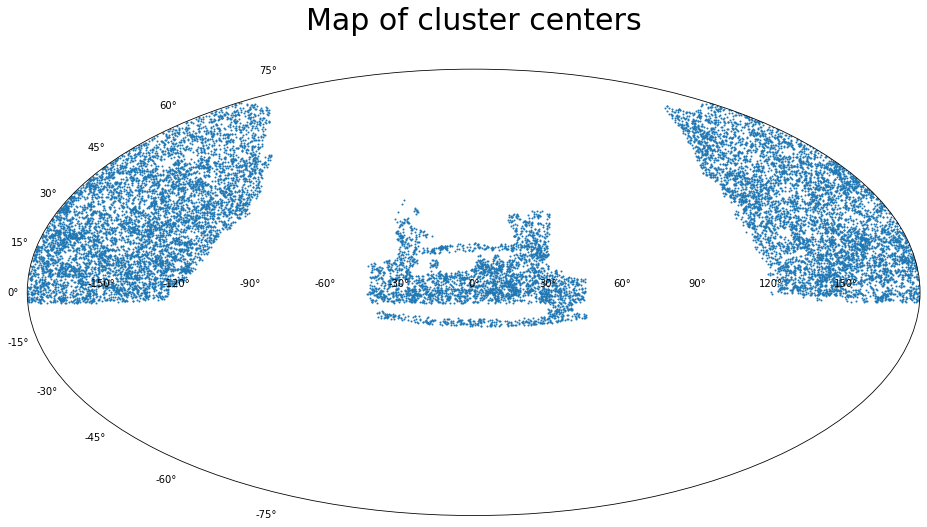

In [168]:
import astropy.coordinates as coord
ra = coord.Angle(clusters['RA']*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(clusters['DEC']*u.degree)

fig = plt.figure(figsize=(16,12))
#fig.suptitle('Map of cluster centers', fontsize=16)
ax = fig.add_subplot(111,projection="mollweide")
ax.set_title("Map of cluster centers\n",fontsize=30)
ax.scatter(ra.radian, dec.radian,s=1)

In [169]:
dr14 = fits.getdata("specObj-dr14.fits")
#cutting dr14 on class
clss = dr14["CLASS"]
dr14 = dr14[np.where(clss == "GALAXY")]
print("Length of dr14 after cutting on class:", len(dr14))
#cutting data with suspicious redshifts
dr14_zwarning = dr14['ZWARNING']
dr14 = dr14[np.where((dr14['ZWARNING']==16) |
                   (dr14['ZWARNING']==0) |
                   (dr14['ZWARNING']==4))]
print("Length of dr14 after cutting out suspicious redshifts:", len(dr14))
np.save("cut_clusters.npy", clusters)
np.save("cut_dr14.npy", dr14)

Length of dr14 after cutting on class: 2779151
Length of dr14 after cutting out suspicious redshifts: 2635685


In [170]:
dt=dr14[1:5]
df=pd.DataFrame.from_records(dt.tolist(), columns=dt.dtype.names)

In [171]:
pd.set_option('display.max_columns', 500)
df.head()

,SURVEY,INSTRUMENT,CHUNK,PROGRAMNAME,PLATERUN,PLATEQUALITY,PLATESN2,DEREDSN2,LAMBDA_EFF,BLUEFIBER,ZOFFSET,SNTURNOFF,NTURNOFF,SPECPRIMARY,SPECSDSS,SPECLEGACY,SPECSEGUE,SPECSEGUE1,SPECSEGUE2,SPECBOSS,BOSS_SPECOBJ_ID,SPECOBJID,FLUXOBJID,BESTOBJID,TARGETOBJID,PLATEID,NSPECOBS,FIRSTRELEASE,RUN2D,RUN1D,DESIGNID,CX,CY,CZ,XFOCAL,YFOCAL,SOURCETYPE,TARGETTYPE,THING_ID_TARGETING,THING_ID,PRIMTARGET,SECTARGET,LEGACY_TARGET1,LEGACY_TARGET2,SPECIAL_TARGET1,SPECIAL_TARGET2,SEGUE1_TARGET1,SEGUE1_TARGET2,SEGUE2_TARGET1,SEGUE2_TARGET2,MARVELS_TARGET1,MARVELS_TARGET2,BOSS_TARGET1,BOSS_TARGET2,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,EBOSS_TARGET_ID,ANCILLARY_TARGET1,ANCILLARY_TARGET2,SPECTROGRAPHID,PLATE,TILE,MJD,FIBERID,OBJID,PLUG_RA,PLUG_DEC,CLASS,SUBCLASS,Z,Z_ERR,RCHI2,DOF,RCHI2DIFF,TFILE,TCOLUMN,NPOLY,THETA,VDISP,VDISP_ERR,VDISPZ,VDISPZ_ERR,VDISPCHI2,VDISPNPIX,VDISPDOF,WAVEMIN,WAVEMAX,WCOVERAGE,ZWARNING,SN_MEDIAN_ALL,SN_MEDIAN,CHI68P,FRACNSIGMA,FRACNSIGHI,FRACNSIGLO,SPECTROFLUX,SPECTROFLUX_IVAR,SPECTROSYNFLUX,SPECTROSYNFLUX_IVAR,SPECTROSKYFLUX,ANYANDMASK,ANYORMASK,SPEC1_G,SPEC1_R,SPEC1_I,SPEC2_G,SPEC2_R,SPEC2_I,ELODIE_FILENAME,ELODIE_OBJECT,ELODIE_SPTYPE,ELODIE_BV,ELODIE_TEFF,ELODIE_LOGG,ELODIE_FEH,ELODIE_Z,ELODIE_Z_ERR,ELODIE_Z_MODELERR,ELODIE_RCHI2,ELODIE_DOF,Z_NOQSO,Z_ERR_NOQSO,ZWARNING_NOQSO,CLASS_NOQSO,SUBCLASS_NOQSO,RCHI2DIFF_NOQSO,Z_PERSON,CLASS_PERSON,Z_CONF_PERSON,COMMENTS_PERSON,CALIBFLUX,CALIBFLUX_IVAR
0,b'sdss ',b'SDSS',b'chunk4 ',b'legacy ',b'chunk4 ',b'bad ',7.67533,0.0,5000.0,-1,0.0,-9999.0,-1,0,0,0,0,0,0,0,0,b' 299489951853078528',b'1237648720142532891',b'1237648720142532891',b' 284722522489067',b'299489402097264640 ',2,b'dr7 ',b'26 ',b' ',-1,-0.837779,0.545736,-0.017286,223.895264,-229.371475,b'GALAXY ',b'SCIENCE ',0,0,64,0,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,266,122,51602,2,"[756, 1, 1, 208, 235]",146.91945,-0.990492,b'GALAXY',b' ',0.213925,0.000052,1.331336,3781,0.179131,b'spEigenGal-53724.fits ',"[0, 1, 2, 3, -1, -1, -1, -1, -1, -1]",3,"[0.0010820967, -0.00072769454, 0.00017138326, ...",140.481186,15.037567,0.0,0.0,2411.130859,2168.0,2117,3806.273682,9202.376953,0.3788,0,6.404140,"[0.28766504, 2.889865, 8.041731, 11.329487, 6....",1.128138,"[0.37328404, 0.082365364, 0.012407603, 0.00211...","[0.1906019, 0.03590285, 0.0034318902, 0.000263...","[0.18268216, 0.046462514, 0.008975713, 0.00184...","[1.6532618, 7.8250813, 25.460802, 43.279358, 5...","[1.3083245, 3.584985, 2.2375822, 0.94482714, 0...","[2.398492, 7.625629, 26.001242, 42.39586, 56.3...","[2.9729717, 3.7280796, 2.3420036, 1.2020608, 0...","[8.733313, 14.05917, 35.154484, 68.445114, 151...",231800832,266272768,20.858,16.172701,13.4718,13.3075,10.6615,7.67533,b' ',b' ',b' ',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,b' ',b' ',0.0,0.0,0,0,b' ',"[1.1392211, 8.03663, 26.473278, 43.175724, 59....","[21.752548, 30.542433, 11.013974, 6.410736, 0...."
1,b'sdss ',b'SDSS',b'chunk4 ',b'legacy ',b'chunk4 ',b'bad ',7.67533,0.0,5000.0,-1,0.0,-9999.0,-1,0,0,0,0,0,0,0,0,b' 299490501608892416',b'1237650795146576030',b'1237650795146576030',b' 284705867301092',b'299489402097264640 ',2,b'dr7 ',b'26 ',b' ',-1,-0.837252,0.546635,-0.014118,210.720093,-189.606415,b'GALAXY ',b'SCIENCE ',0,0,96,0,96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,266,122,51602,4,"[752, 1, 2, 22, 228]",146.85983,-0.808902,b'GALAXY',b' ',0.126554,0.000062,1.338671,3763,0.153335,b'spEigenGal-53724.fits ',"[0, 1, 2, 3, -1, -1, -1, -1, -1, -1]",3,"[0.0008673469, -0.0033480704, 0.00864589, 0.01...",201.574417,18.037975,0.0,0.0,2355.973389,2168.0,2117,3806.273682,9202.376953,0.3770,0,9.002916,"[0.47428927, 3.9845273, 11.338174, 16.175774, ...",1.126414,"[0.3718833, 0.07877984, 0.012466843, 0.0013262...","[0.17851458, 0.03156499, 0.0031830238, 0.0, 0....","[0.1933687, 0.047214855, 0.009283819, 0.001326...","[1.749979, 9.648142, 35.343086, 66.24687, 97.5...","[1.3083245, 3.584985, 2.2375822, 0.94482714, 0...","[2.5969996, 9.484542, 35.986866, 65.67462, 100...","[2.9729717, 3.7280796, 2.3420036, 1.2020608, 0...","[8.019086,

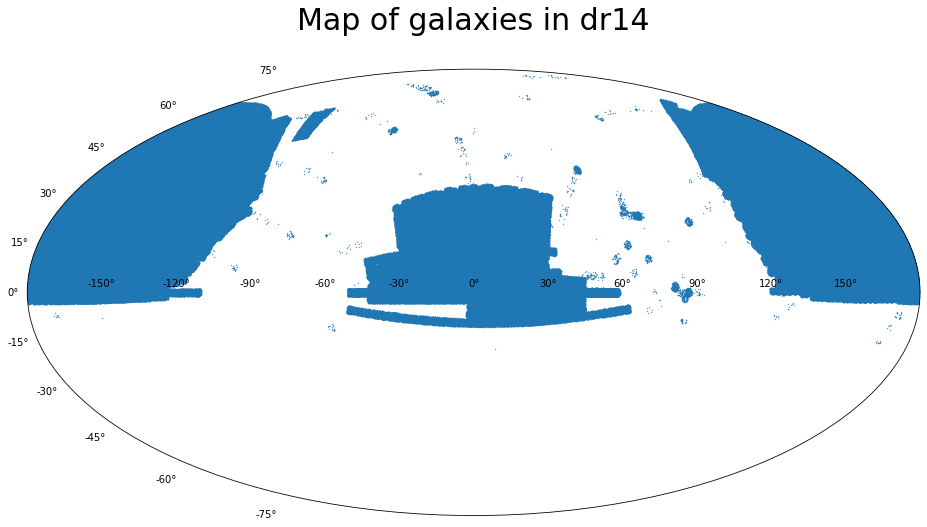

In [172]:
ra = coord.Angle(dr14['PLUG_RA']*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(dr14['PLUG_DEC']*u.degree)

fig = plt.figure(figsize=(16,12))
#fig.suptitle('Map of galaxies in dr14', fontsize=16)
ax = fig.add_subplot(111,projection="mollweide")
ax.set_title("Map of galaxies in dr14\n",fontsize=30)
ax.scatter(ra.radian, dec.radian,s=0.1)

In [173]:
ra=dr14['PLUG_RA']
dec=dr14['PLUG_DEC']
zoom_dr14=dr14[np.where((ra>120) & (ra<160) & (dec>10) & (dec<50))]

In [174]:
dt=zoom_dr14[1:5]
df=pd.DataFrame.from_records(dt.tolist(), columns=dt.dtype.names)
df

,SURVEY,INSTRUMENT,CHUNK,PROGRAMNAME,PLATERUN,PLATEQUALITY,PLATESN2,DEREDSN2,LAMBDA_EFF,BLUEFIBER,ZOFFSET,SNTURNOFF,NTURNOFF,SPECPRIMARY,SPECSDSS,SPECLEGACY,SPECSEGUE,SPECSEGUE1,SPECSEGUE2,SPECBOSS,BOSS_SPECOBJ_ID,SPECOBJID,FLUXOBJID,BESTOBJID,TARGETOBJID,PLATEID,NSPECOBS,FIRSTRELEASE,RUN2D,RUN1D,DESIGNID,CX,CY,CZ,XFOCAL,YFOCAL,SOURCETYPE,TARGETTYPE,THING_ID_TARGETING,THING_ID,PRIMTARGET,SECTARGET,LEGACY_TARGET1,LEGACY_TARGET2,SPECIAL_TARGET1,SPECIAL_TARGET2,SEGUE1_TARGET1,SEGUE1_TARGET2,SEGUE2_TARGET1,SEGUE2_TARGET2,MARVELS_TARGET1,MARVELS_TARGET2,BOSS_TARGET1,BOSS_TARGET2,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,EBOSS_TARGET_ID,ANCILLARY_TARGET1,ANCILLARY_TARGET2,SPECTROGRAPHID,PLATE,TILE,MJD,FIBERID,OBJID,PLUG_RA,PLUG_DEC,CLASS,SUBCLASS,Z,Z_ERR,RCHI2,DOF,RCHI2DIFF,TFILE,TCOLUMN,NPOLY,THETA,VDISP,VDISP_ERR,VDISPZ,VDISPZ_ERR,VDISPCHI2,VDISPNPIX,VDISPDOF,WAVEMIN,WAVEMAX,WCOVERAGE,ZWARNING,SN_MEDIAN_ALL,SN_MEDIAN,CHI68P,FRACNSIGMA,FRACNSIGHI,FRACNSIGLO,SPECTROFLUX,SPECTROFLUX_IVAR,SPECTROSYNFLUX,SPECTROSYNFLUX_IVAR,SPECTROSKYFLUX,ANYANDMASK,ANYORMASK,SPEC1_G,SPEC1_R,SPEC1_I,SPEC2_G,SPEC2_R,SPEC2_I,ELODIE_FILENAME,ELODIE_OBJECT,ELODIE_SPTYPE,ELODIE_BV,ELODIE_TEFF,ELODIE_LOGG,ELODIE_FEH,ELODIE_Z,ELODIE_Z_ERR,ELODIE_Z_MODELERR,ELODIE_RCHI2,ELODIE_DOF,Z_NOQSO,Z_ERR_NOQSO,ZWARNING_NOQSO,CLASS_NOQSO,SUBCLASS_NOQSO,RCHI2DIFF_NOQSO,Z_PERSON,CLASS_PERSON,Z_CONF_PERSON,COMMENTS_PERSON,CALIBFLUX,CALIBFLUX_IVAR
0,b'sdss ',b'SDSS',b'chunk10 ',b'legacy ',b'dr2000.11 ',b'good ',21.844400,0.0,5000.0,-1,0.0,-9999.0,-1,1,1,1,0,0,0,0,0,b' 489937190231500800',b'1237653589018607873',b'1237653589018607873',b' 850202202931374',b'489766491051288576 ',1,b'dr7 ',b'26 ',b' ',-1,-0.380870,0.650359,0.657245,280.928192,163.246811,b'GALAXY ',b'SCIENCE ',0,0,96,0,96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,435,222,51882,621,"[1345, 3, 1, 75, 174]",120.35454,41.090102,b'GALAXY',b' ',0.042910,0.000012,1.019886,3722,3.101884,b'spEigenGal-53724.fits ',"[0, 1, 2, 3, -1, -1, -1, -1, -1, -1]",3,"[0.007399622, -0.00039409558, 0.0040396103, -0...",119.552528,4.667109,0.0,0.0,1803.982178,2168.0,2117,3830.892822,9212.977539,0.3729,0,28.683802,"[5.208241, 22.024595, 36.475796, 38.27247, 26....",0.993667,"[0.31536606, 0.049074817, 0.0048270314, 0.0002...","[0.16304639, 0.024135157, 0.0024135157, 0.0, 0...","[0.15231965, 0.024939662, 0.0024135157, 0.0002...","[22.578321, 68.56881, 155.88087, 224.59497, 28...","[0.94396675, 2.4672768, 2.6722467, 1.4987447, ...","[19.941282, 68.54008, 155.52257, 224.69547, 28...","[2.344899, 2.4747925, 2.6577387, 1.6308849, 1....","[14.075052, 17.132914, 37.079697, 71.44719, 13...",92274688,264175616,25.552500,26.056000,24.0172,29.270599,25.089199,21.844400,b' ',b' ',b' ',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,b' ',b' ',0.0,0.0,0,0,b' ',"[13.18321, 67.773, 154.16849, 232.84645, 315.3...","[5.6643844, 9.149228, 3.7439244, 2.318031, 0.2..."
1,b'sdss ',b'SDSS',b'chunk10 ',b'legacy ',b'dr2000.11 ',b'good ',21.844400,0.0,5000.0,-1,0.0,-9999.0,-1,1,1,1,0,0,0,0,0,b' 489940763644291072',b'1237653589018411272',b'1237653589018411272',b' 850202202734897',b'489766491051288576 ',1,b'dr7 ',b'26 ',b' ',-1,-0.379819,0.656011,0.652217,235.196442,79.183525,b'GALAXY ',b'SCIENCE ',0,0,64,0,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,435,222,51882,634,"[1345, 3, 1, 72, 305]",120.07012,40.708998,b'GALAXY',b'STARFORMING ',0.059057,0.000012,1.545714,3723,0.603138,b'spEigenGal-53724.fits ',"[0, 1, 2, 3, -1, -1, -1, -1, -1, -1]",3,"[0.0011564945, 0.002830125, -0.004069608, 0.00...",0.000000,48.731594,0.0,0.0,2284.058838,2168.0,2117,3835.305908,9215.098633,0.3730,0,7.153806,"[1.7774674, 6.0948725, 9.392778, 9.797388, 4.8...",1.153916,"[0.38954425, 0.094906166, 0.020643432, 0.00589...","[0.19571045, 0.04396783, 0.0069705094, 0.00268...","[0.19383378, 0.050938338, 0.013672922, 0.00321...","[5.6751256, 13.081294, 21.900888, 28.100365, 3...","[0.94396675, 2.4672768, 2.6722467, 1.4987447, ...","[5.380189, 13.001783, 21.7466, 28.499065, 31.5...","[2.344899, 2.4747925, 2.6577387

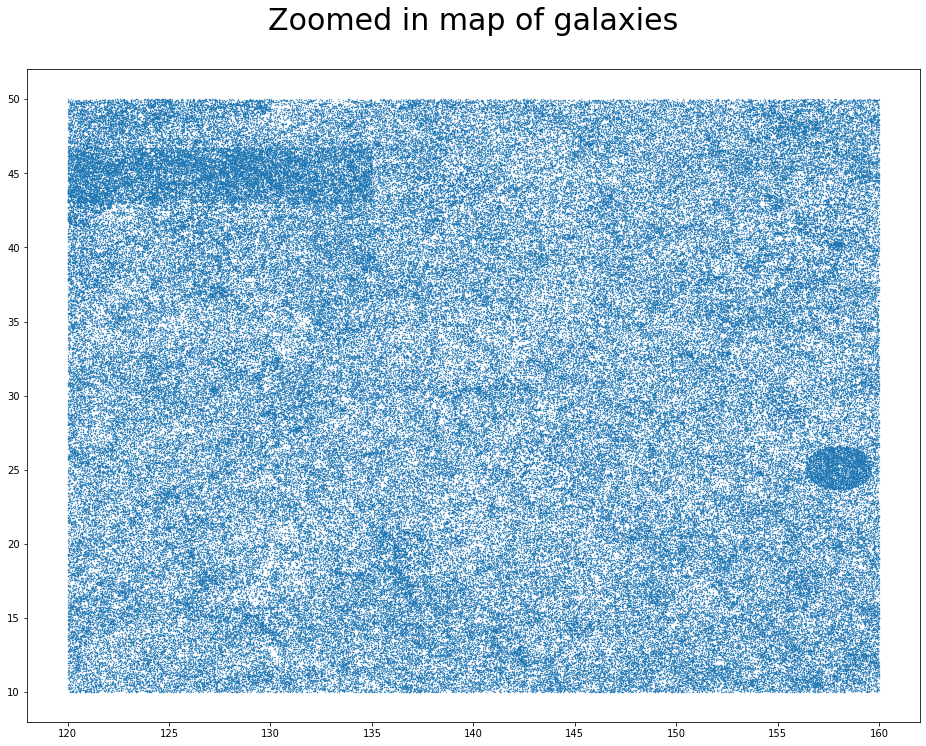

In [175]:
fig = plt.figure(figsize=(16,12))
#fig.suptitle('Map of cluster centers', fontsize=16)
ax = fig.add_subplot(111)
ax.set_title("Zoomed in map of galaxies\n",fontsize=30)
ax.scatter(zoom_dr14['PLUG_RA'],zoom_dr14['PLUG_DEC'],s=0.1)

In [176]:
def matchingroutine (RAnew, DECnew, RAorig, DECorig):

    new_ra = Angle(RAnew, unit=u.degree)
    new_dec = Angle(DECnew, unit=u.degree)
    red_coord = SkyCoord(ra=new_ra, dec=new_dec, unit = (u.deg, u.deg))

    orig_ra = Angle(RAorig, unit=u.degree)
    orig_dec = Angle(DECorig, unit=u.degree)
    sdss_coord = SkyCoord(ra=orig_ra, dec=orig_dec, unit = (u.deg, u.deg))

    idx, d2d, d3d = red_coord.match_to_catalog_sky(sdss_coord)

    #print ("idx is %s long" % (len(idx)))
    #print("idx refers to indices in the second catalog that items in the first match")
    return idx, d2d


In [177]:
dr14_ra = dr14["PLUG_RA"]
dr14_dec = dr14["PLUG_DEC"]
members=clusters
member_ra = members["RA"]
member_dec = members["DEC"]

#Matches first to second: what index of dr14 does members[i] correspond to?
idx, d2d = matchingroutine(member_ra, member_dec, dr14_ra, dr14_dec)
print("Length of member matching data:", len(idx))

good_matches = np.where(d2d <= 2*u.arcsec)[0]
print("Length of matching data after cutting bad distance matches:", len(good_matches))
members = members[good_matches]
idx = idx[good_matches]
dr14 = dr14[idx]

member_z = members["BCG_SPEC_Z"]
dr14_z = dr14["Z"]

good_matches = np.where(np.abs(member_z - dr14_z) < 0.03)[0]

print("Length of matching data after cutting differing z values:", len(good_matches))

members = members[good_matches]
dr14 = dr14[good_matches]

Length of member matching data: 16656
Length of matching data after cutting bad distance matches: 16610
Length of matching data after cutting differing z values: 16605


In [178]:
supplemented_clusters=np.array(rec.append_fields(members, "ZCEN_ERR", dr14["Z_ERR"],usemask=False))

In [179]:
dt=supplemented_clusters[1:5]
df=pd.DataFrame.from_records(dt.tolist(), columns=dt.dtype.names)
df

,MEM_MATCH_ID,RA,DEC,MODEL_MAG,MODEL_MAGERR,IMAG,IMAG_ERR,ZRED,ZRED_E,ZRED_CHISQ,BCG_SPEC_Z,Z_SPEC_INIT,Z_INIT,Z,LAMBDA_CHISQ,LAMBDA_CHISQ_E,LAMBDA_ZRED,LAMBDA_ZRED_E,R_LAMBDA,SCALEVAL,MASKFRAC,C_LAMBDA,C_LAMBDA_ERR,MAG_LAMBDA_ERR,CHISQ,Z_LAMBDA,Z_LAMBDA_E,EBV_MEAN,PHOTOID,LNLAMLIKE,LNBCGLIKE,LNLIKE,PZBINS,PZ,NCROSS,RMASK,RA_ORIG,DEC_ORIG,W,DLAMBDA_DZ,DLAMBDA_DZ2,DLAMBDAVAR_DZ,DLAMBDAVAR_DZ2,LAMBDA_CHISQ_C,LAMBDA_CHISQ_CE,NCENT,NCENT_GOOD,RA_CENT,DEC_CENT,ID_CENT,LAMBDA_CHISQ_CENT,ZLAMBDA_CENT,P_BCG,P_CEN,Q_CEN,P_FG,Q_MISS,P_SAT,P_C,BCG_ILUM,ILUM,Z_LAMBDA_RAW,Z_LAMBDA_E_RAW,LIM_EXPTIME,LIM_LIMMAG,LIM_LIMMAG_HARD,ZCEN_ERR
0,4,230.600092,27.714369,"[17.745682, 15.765336, 14.839079, 14.427721, 1...","[0.024927424, 0.0032128638, 0.0025435446, 0.00...",14.448995,0.002525,0.076568,0.011801,3.239213,0.069041,-1.000000,0.051038,0.080261,133.515747,4.397382,130.678329,3.920125,1.059514,1.046523,0.046024,"[1.8691438, 0.87587416, 0.39345893, 0.31646612]","[0.0024012516, 6.466713e-05, 4.4463868e-05, 0....","[0.0023605237, 4.0946295e-05, 2.2213657e-05, 2...",2.258066,0.079783,0.007193,0.015627,45120301202090548,360.167908,-3.511638,356.656281,"[0.03921186, 0.043268934, 0.047326013, 0.05138...","[9.779953e-06, 0.00020469692, 0.002381726, 0.0...",1,1.589270,230.621564,27.707631,1.393579,4.253886,141.704514,196.791122,8643.178711,133.969025,0.748697,5,4,"[230.60009187643863, 230.62156355660142, 230.6...","[27.714369052606486, 27.707631468188342, 27.67...","[28885825, 28886055, 28886128, 28886049, 28885...","[133.51575, 134.87344, 132.69199, 133.79034, 1...","[0.08003884, 0.07969745, 0.0, 0.0, 0.0]","[1.0, 1.0, 1.0, 1.0, 1.0]","[0.54657, 0.37469944, 0.057146966, 0.016078142...","[0.24606082, 0.16868626, 0.025727041, 0.007238...","[9.386968e-05, 0.0045184894, 0.00039432713, 0....",-1.322825,"[0.45333612, 0.620782, 0.9424587, 0.9828617, 0...","[0.30917212, 0.23477708, 0.044700995, 0.012993...",3.392455,87.916885,0.080039,0.001728,175.399353,21.140350,21.0,0.000017
1,6,203.833723,41.001146,"[19.995804, 17.901672, 16.366825, 15.850655, 1...","[0.107984856, 0.009154892, 0.0045009954, 0.004...",15.923666,0.004324,0.258183,0.010269,5.782617,0.228309,0.228309,0.258183,0.236098,190.996490,5.667876,175.711014,5.209084,1.138165,1.007606,0.010407,"[1.87869, 1.3443203, 0.4924913, 0.33730394]","[0.12091971, 0.0012286201, 0.00045845855, 0.00...","[0.11959795, 0.00097178435, 0.00023139443, 0.0...",11.636747,0.231596,0.005989,0.015653,39190301400210138,322.990448,2.318103,325.308563,"[0.19635104, 0.19987558, 0.2034001, 0.20692465...","[8.6275793e-07, 2.8410159e-05, 0.0008116087, 0...",1,1.707247,203.833723,41.001146,1.171649,5.743537,88.327370,341.513123,8660.248047,190.996490,0.000000,5,1,"[203.83372267931975, 203.81826148910173, 203.7...","[41.0011464409052, 41.013149364143544, 40.9775...","[23718404, 23718515, 23718433, 23718443, 23718...","[190.99649, 0.0, 0.0, 0.0, 0.0]","[0.23023634, 0.0, 0.0, 0.0, 0.0]","[1.0, 1.0, 1.0, 1.0, 1.0]","[0.9996656, 0.0003289845, 4.359725e-06, 7.1390...","[0.97640026, 0.000321328, 4.258261e-06, 6.9729...","[3.3679346e-05, 0.0016452592, 0.009282246, 0.0...",-7.500886,"[0.00030070273, 0.9980258, 0.9907134, 0.934557...","[0.9767193, 0.01361882, 0.0001829359, 2.996047...",8.065262,131.307648,0.230236,0.001983,276.459167,21.120052,21.0,0.000032
2,8,150.558906,20.537949,"[21.571142, 19.440008, 17.76432, 17.182882, 16...","[0.4019186, 0.027899064, 0.010375315, 0.009191...",17.218683,0.009204,0.307712,0.016845,1.670911,0.319619,0.320468,0.294900,0.317472,153.392975,5.798571,116.826805,5.647635,1.089334,0.991426,0.000000,"[1.7378201, 1.5410571, 0.5642925, 0.3710528]","[0.4319495, 0.0051411786, 0.0011786495, 0.0033...","[0.42127, 0.004448875, 0.0006520851, 0.0005207...",0.935555,0.324495,0.012751,0.032738,51380301200690289,310.611298,-1.126765,309.484528,"[0.2455487, 0.25344333, 0.261338, 0.26923263, ...","[4.78119e-09, 4.886734e-07, 2.7867156e-05, 0.0...",1,1.634001,150.611819,20.517165,1.124652,8.069870,327.751801,197.223557,25316.32

In [180]:
np.save("complete_clusters.npy",supplemented_clusters)

In [181]:
def get_angular_diameter_distances(z):
    """
    Same as the other get_ functions, this one returns angular diameter
    distance, which is the line of sight distance to a point (calculated
    using FlatLambdaCDM cosmology as a function of redshift). """
    try:
        return np.load("angular_diameter_distances.npy") * u.Mpc
    except:
        #returns quantity with Mpc units (not retained upon saving)
        from astropy.cosmology import FlatLambdaCDM
        COSMO = FlatLambdaCDM(H0=100, Om0=0.3)
        angular_diameter_distances = COSMO.angular_diameter_distance(z)
        np.save("angular_diameter_distances.npy", angular_diameter_distances.value)
        return angular_diameter_distances

def get_r_lambda(richness):
    """
    R_lambda is defined as (richness/100)^0.2 H-1 MPC, which I calculate
    here. Note, I was dealing with a few different units, so I kept
    track of them by using the quantity objects, which is a unit and a
    value. (See API for details) """
    try:
        return np.load("r_lambda.npy") * u.Mpc
    except:
        r_lambda = ((richness / 100)**0.2)
        np.save("r_lambda.npy", r_lambda)
        return r_lambda * u.Mpc

def get_theta_max(z, richness):
    """
    Load in file or calculate theta max.
    Theta max is given by 5*r_lambda / angular distance diameter.
    Theta max values are in radians, both r_lambda and angular
    distance diameter are calculated in Mpc.
    """
    try:
        return np.load("theta_max.npy") * u.rad
    except:
        angular_diameter_distances = get_angular_diameter_distances(z)
        r_lambda = get_r_lambda(richness)
        theta_max = 5*r_lambda/angular_diameter_distances
        np.save("theta_max.npy", theta_max.value)
        return theta_max


In [182]:
def calc_separation(ra1, dec1, ra2, dec2):
    """
    Determine the angular on sky separation between
    a member galaxy and its cluster."""
    ra_1 = Angle(ra1, unit=u.degree)
    dec_1 = Angle(dec1, unit=u.degree)
    coord1 = SkyCoord(ra=ra_1, dec=dec_1, unit = (u.deg, u.deg))

    ra_2 = Angle(ra2, unit=u.degree)
    dec_2 = Angle(dec2, unit=u.degree)
    coord2 = SkyCoord(ra=ra_2, dec=dec_2, unit = (u.deg, u.deg))

    sep = coord1.separation(coord2)
    return sep.radian

def calculate_velocity(redshift, central_redshift):
    """Calculate the velocity of a given galaxy with respect to
    its cluster's central galaxy. Units are m/s, as dictated
    when c is imported from scipy.constants.

    Parameters
    ----------
    redshift : float
        The galaxy's spectroscopic redshift

    central_redshift : float
        Spectroscopic redshift of the central galaxy in the cluster
        to which the galaxy that interests us belongs.

    Returns
    -------
    velocity : float
        The galaxy's velocity with respect to the cluster's central
        galaxy in m/s. If this value is greater than the speed of
        light, RUN! Just kidding. Values that are too high signify
        galaxies that don't truly belong to the cluster ("interlopers").
        Consult the redMaPPer IV paper for what constitues "too high".
    """
    velocity = c * (redshift - central_redshift) / (1 + central_redshift)
    return velocity  # units [m/s]

def calculate_vmax(richness):
    """Calculate the absolute velocity cutoff for interlopers in m/s.
    Follows equation (7) in redMaPPer IV.

    Parameters
    ----------
    richness : float
        Cluster richness, i.e. estimated number of galaxies belonging
        to the cluster.

    Returns
    -------
    vmax : float
        Maximum velocity value as set forth in equation (7) of redMaPPer IV.
        Units: m/s
    """
    vmax = 3e6 * (richness / 20.0) ** 0.45  # m/s
    return vmax  # m/s



In [183]:
clusters=supplemented_clusters
print("Length of clusters:", len(clusters))
print("Number of fields in clusters:", len(clusters[0]))
richness = clusters["LAMBDA_CHISQ"]
cluster_z = clusters["BCG_SPEC_Z"]
cluster_ra = (clusters["RA"] * u.deg).to(u.rad).value
cluster_dec = (clusters["DEC"] * u.deg).to(u.rad).value
dr14_ra = (dr14["PLUG_RA"] * u.deg).to(u.rad).value
dr14_dec = (dr14["PLUG_DEC"] * u.deg).to(u.rad).value
theta_max = get_theta_max(cluster_z, richness).value

#Filed names in the dr14 catalog
dr14_get_fields = ["Z", "Z_ERR", "PLUG_RA", "PLUG_DEC"]
#fields that I choose to add to the data catalog
dr14_put_fields = ["Z_MEM", "ZMEM_ERR", "MEM_RA", "MEM_DEC"]
keeps = 0

"""This will take a few hours"""
for i in range(len(clusters)):
    if(i % 1000 == 0):
        print("Cluster number: ", i)
    this_ra = cluster_ra[i]
    this_dec = cluster_dec[i]
    this_tmax = theta_max[i]

    delta_ra = np.abs(this_ra - dr14_ra)
    delta_dec = np.abs(np.sin(this_dec) - np.sin(dr14_dec))

    idx_in_range = np.where((delta_ra < this_tmax) & (delta_dec < this_tmax))[0]
    dr14_in_range = dr14[idx_in_range]
    data_from_dr14 = [dr14_in_range[field] for field in dr14_get_fields]

    new_data = rec.append_fields(np.repeat(clusters[i], len(idx_in_range)), dr14_put_fields, data_from_dr14)
    if type(keeps) is int:
        keeps = new_data
    else:
        keeps = np.append(keeps, new_data)
print("Number of galaxies within 5 r_lambda:", len(keeps))
print("Length of these data points = len(clusters[0]) + 4:", len(keeps[0]))
np.save("square_cut_catalog.npy", np.array(keeps))

Length of clusters: 16605
Number of fields in clusters: 67
Cluster number:  0
Cluster number:  1000
Cluster number:  2000
Cluster number:  3000
Cluster number:  4000
Cluster number:  5000
Cluster number:  6000
Cluster number:  7000
Cluster number:  8000
Cluster number:  9000
Cluster number:  10000
Cluster number:  11000
Cluster number:  12000
Cluster number:  13000
Cluster number:  14000
Cluster number:  15000
Cluster number:  16000
Number of galaxies within 5 r_lambda: 40364
Length of these data points = len(clusters[0]) + 4: 71


In [184]:
cut_catalog=np.array(keeps)
dt=cut_catalog[1:5]
df=pd.DataFrame.from_records(dt.tolist(), columns=dt.dtype.names)
df

,MEM_MATCH_ID,RA,DEC,MODEL_MAG,MODEL_MAGERR,IMAG,IMAG_ERR,ZRED,ZRED_E,ZRED_CHISQ,BCG_SPEC_Z,Z_SPEC_INIT,Z_INIT,Z,LAMBDA_CHISQ,LAMBDA_CHISQ_E,LAMBDA_ZRED,LAMBDA_ZRED_E,R_LAMBDA,SCALEVAL,MASKFRAC,C_LAMBDA,C_LAMBDA_ERR,MAG_LAMBDA_ERR,CHISQ,Z_LAMBDA,Z_LAMBDA_E,EBV_MEAN,PHOTOID,LNLAMLIKE,LNBCGLIKE,LNLIKE,PZBINS,PZ,NCROSS,RMASK,RA_ORIG,DEC_ORIG,W,DLAMBDA_DZ,DLAMBDA_DZ2,DLAMBDAVAR_DZ,DLAMBDAVAR_DZ2,LAMBDA_CHISQ_C,LAMBDA_CHISQ_CE,NCENT,NCENT_GOOD,RA_CENT,DEC_CENT,ID_CENT,LAMBDA_CHISQ_CENT,ZLAMBDA_CENT,P_BCG,P_CEN,Q_CEN,P_FG,Q_MISS,P_SAT,P_C,BCG_ILUM,ILUM,Z_LAMBDA_RAW,Z_LAMBDA_E_RAW,LIM_EXPTIME,LIM_LIMMAG,LIM_LIMMAG_HARD,ZCEN_ERR,Z_MEM,ZMEM_ERR,MEM_RA,MEM_DEC
0,1,239.583329,27.233413,"[17.76729, 15.414802, 14.3970995, 13.97824, 13...","[0.049571823, 0.0037844528, 0.0027201786, 0.00...",13.97901,0.002698,0.098928,0.009839,17.784441,0.090807,0.090807,0.098928,0.100195,180.104446,4.361782,171.912521,4.388915,1.124877,1.011351,0.011557,"[1.9093423, 0.93780553, 0.41376486, 0.34006575]","[0.00497283, 0.00010319616, 6.815568e-05, 0.00...","[0.0049054394, 6.894528e-05, 3.42551e-05, 3.29...",15.773688,0.095777,0.00551,0.015627,39270301200850016,432.431091,3.524559,435.955658,"[0.065145, 0.06820817, 0.07127133, 0.0743345, ...","[1.3085691e-05, 0.0002135314, 0.0035602371, 0....",1,1.687315,239.583329,27.233413,1.094567,23.220964,-1341.603394,364.674957,7688.530762,179.612991,1.490858,5,2,"[239.5833290688836, 239.55540499547743, 239.60...","[27.233412917827273, 27.248122201838974, 27.22...","[24058604, 24058319, 24058603, 24058360, 24058...","[180.10445, 175.08556, 175.43642, 176.35172, 1...","[0.097549744, 0.097568356, 0.0, 0.0, 0.0]","[1.0, 1.0, 1.0, 1.0, 1.0]","[0.9020757, 0.09792038, 3.5944406e-06, 2.42353...","[0.81327194, 0.08828073, 3.2405903e-06, 2.1849...","[0.00061520457, 0.001319927, 0.0047987234, 0.0...",-5.677336,"[0.09730909, 0.9007597, 0.9951977, 0.99585867,...","[0.8920236, 0.472786, 3.2917105e-05, 2.2194863...",7.868203,124.580933,0.09755,0.001528,176.004425,21.01368,21.0,0.000029,0.167441,0.000043,240.43568,27.302635
1,1,239.583329,27.233413,"[17.76729, 15.414802, 14.3970995, 13.97824, 13...","[0.049571823, 0.0037844528, 0.0027201786, 0.00...",13.97901,0.002698,0.098928,0.009839,17.784441,0.090807,0.090807,0.098928,0.100195,180.104446,4.361782,171.912521,4.388915,1.124877,1.011351,0.011557,"[1.9093423, 0.93780553, 0.41376486, 0.34006575]","[0.00497283, 0.00010319616, 6.815568e-05, 0.00...","[0.0049054394, 6.894528e-05, 3.42551e-05, 3.29...",15.773688,0.095777,0.00551,0.015627,39270301200850016,432.431091,3.524559,435.955658,"[0.065145, 0.06820817, 0.07127133, 0.0743345, ...","[1.3085691e-05, 0.0002135314, 0.0035602371, 0....",1,1.687315,239.583329,27.233413,1.094567,23.220964,-1341.603394,364.674957,7688.530762,179.612991,1.490858,5,2,"[239.5833290688836, 239.55540499547743, 239.60...","[27.233412917827273, 27.248122201838974, 27.22...","[24058604, 24058319, 24058603, 24058360, 24058...","[180.10445, 175.08556, 175.43642, 176.35172, 1...","[0.097549744, 0.097568356, 0.0, 0.0, 0.0]","[1.0, 1.0, 1.0, 1.0, 1.0]","[0.9020757, 0.09792038, 3.5944406e-06, 2.42353...","[0.81327194, 0.08828073, 3.2405903e-06, 2.1849...","[0.00061520457, 0.001319927, 0.0047987234, 0.0...",-5.677336,"[0.09730909, 0.9007597, 0.9951977, 0.99585867,...","[0.8920236, 0.472786, 3.2917105e-05, 2.2194863...",7.868203,124.580933,0.09755,0.001528,176.004425,21.01368,21.0,0.000029,0.089520,0.000013,239.92372,26.499504
2,1,239.583329,27.233413,"[17.76729, 15.414802, 14.3970995, 13.97824, 13...","[0.049571823, 0.0037844528, 0.0027201786, 0.00...",13.97901,0.002698,0.098928,0.009839,17.784441,0.090807,0.090807,0.098928,0.100195,180.104446,4.361782,171.912521,4.388915,1.124877,1.011351,0.011557,"[1.9093423, 0.93780553, 0.41376486, 0.34006575]","[0.00497283, 0.00010319616, 6.815568e-05, 0.00...","[0.0049054394, 6.894528e-05, 3.42551e-05, 3.29...",15.773688,0.095777,0.00551,0.015627,39270301200850016,432.431091,3.524559,435.955658,"[0.065145, 0.06820817, 0.07127133, 0.0743

In [185]:
def add_velocity(data):
    print("Length of data before velocity cut: ", len(data))
    zcen = data["BCG_SPEC_Z"]
    richness = data["LAMBDA_CHISQ"]
    member_redshift = data["Z_MEM"] #only use this to calculate velocity
    velocity = calculate_velocity(member_redshift, zcen)

    data = np.array(rec.append_fields(data, "Velocity", velocity))

    #Making velocity cut (removing those galaxies above the red line)
    max_v = calculate_vmax(richness)
    good_velocity_idx = np.where(np.abs(velocity) <= max_v)[0]
    print(len(max_v), len(good_velocity_idx))
    print(len(zcen), len(richness), len(velocity))
    data = data[good_velocity_idx]

    print("Length of data after velocity cut: ", len(data))
    """
    #If you want to plot vlos vs richness
    plt.title("vlos vs richness")
    plt.ylabel(r'$v_{los} (km/s)$')
    plt.xlabel("$\lambda$")
    plt.yscale("log")
    plt.xscale("log")
    plt.scatter(richness, np.abs(velocity/10**3), c='k', s=0.5, alpha=0.2)
    plt.scatter(data["LAMBDA_CHISQ"], np.abs(data["Velocity"]/10**3), c='r', s=0.5, alpha=0.2)
    lambda_min = np.amin(richness)
    lambda_max = np.amax(richness)
    x_vals = np.linspace(lambda_min, lambda_max, 200)
    member_cut = calculate_vmax(x_vals)
    plt.plot(x_vals, member_cut/10**3, c='r')
    plt.show()"""

    return data


In [186]:
data=cut_catalog
#create_final_catalog.py
# print(len(data.dtype.names)) #checking field names
central_ra = data["RA"]
central_dec = data["DEC"]
member_ra = data["MEM_RA"]
member_dec = data["MEM_DEC"]

richness = data["LAMBDA_CHISQ"]
#Here I realized that "R_LAMBDA" is actually a field in cluster catalog
#and it aligns with the R_lambda that I calculated. Could've saved myself
#some work.
r_lambda = ((richness / 100)**0.2) #Mpc
r_lambda2 = data["R_LAMBDA"]

central_z = data["BCG_SPEC_Z"]
from astropy.cosmology import FlatLambdaCDM
COSMO = FlatLambdaCDM(H0=100, Om0=0.3)
angular_diameter_distances = COSMO.angular_diameter_distance(central_z).value #Mpc

theta_max = 5 * r_lambda / angular_diameter_distances #radians

separation = calc_separation(member_ra, member_dec, central_ra, central_dec) #radians

good_idx = np.where(separation <= theta_max)[0]
print("Number of good points:", len(data))
print("Number of points truly within 5 r_lambda:", len(good_idx))

good_data = data[good_idx]
good_add = angular_diameter_distances[good_idx]
good_angular_separation = separation[good_idx]
good_r = good_angular_separation * good_add
good_r_lambda = good_data["R_LAMBDA"]
good_x = good_r / good_r_lambda

new_fields = ["R", "X"]
new_data = [good_r, good_x]
data_wo_velocity = np.array(rec.append_fields(good_data, new_fields, new_data))
final_catalog = add_velocity(data_wo_velocity)

print("Length of catalog before cutting radius:", len(final_catalog))
radius = final_catalog["R"]
print(radius[::10000])
final_catalog = final_catalog[np.where(radius >= 0.05)]
print("Length of catalog after cutting radius:", len(final_catalog))
#the end product of this script
np.save("final_cut_catalog.npy", final_catalog)

Number of good points: 40364
Number of points truly within 5 r_lambda: 34505
Length of data before velocity cut:  34505
34505 20371
34505 34505 34505
Length of data after velocity cut:  20371
Length of catalog before cutting radius: 20371
[4.89035846e-05 7.40967296e-05 1.16134957e-05]
Length of catalog after cutting radius: 3766


In [187]:
max(final_catalog["MEM_MATCH_ID"])

96092

In [188]:
dt=final_catalog[1:10]
df=pd.DataFrame.from_records(dt.tolist(), columns=dt.dtype.names)
df

,MEM_MATCH_ID,RA,DEC,MODEL_MAG,MODEL_MAGERR,IMAG,IMAG_ERR,ZRED,ZRED_E,ZRED_CHISQ,BCG_SPEC_Z,Z_SPEC_INIT,Z_INIT,Z,LAMBDA_CHISQ,LAMBDA_CHISQ_E,LAMBDA_ZRED,LAMBDA_ZRED_E,R_LAMBDA,SCALEVAL,MASKFRAC,C_LAMBDA,C_LAMBDA_ERR,MAG_LAMBDA_ERR,CHISQ,Z_LAMBDA,Z_LAMBDA_E,EBV_MEAN,PHOTOID,LNLAMLIKE,LNBCGLIKE,LNLIKE,PZBINS,PZ,NCROSS,RMASK,RA_ORIG,DEC_ORIG,W,DLAMBDA_DZ,DLAMBDA_DZ2,DLAMBDAVAR_DZ,DLAMBDAVAR_DZ2,LAMBDA_CHISQ_C,LAMBDA_CHISQ_CE,NCENT,NCENT_GOOD,RA_CENT,DEC_CENT,ID_CENT,LAMBDA_CHISQ_CENT,ZLAMBDA_CENT,P_BCG,P_CEN,Q_CEN,P_FG,Q_MISS,P_SAT,P_C,BCG_ILUM,ILUM,Z_LAMBDA_RAW,Z_LAMBDA_E_RAW,LIM_EXPTIME,LIM_LIMMAG,LIM_LIMMAG_HARD,ZCEN_ERR,Z_MEM,ZMEM_ERR,MEM_RA,MEM_DEC,R,X,Velocity
0,1,239.583329,27.233413,"[17.76729, 15.414802, 14.3970995, 13.97824, 13...","[0.049571823, 0.0037844528, 0.0027201786, 0.00...",13.979010,0.002698,0.098928,0.009839,17.784441,0.090807,0.090807,0.098928,0.100195,180.104446,4.361782,171.912521,4.388915,1.124877,1.011351,0.011557,"[1.9093423, 0.93780553, 0.41376486, 0.34006575]","[0.00497283, 0.00010319616, 6.815568e-05, 0.00...","[0.0049054394, 6.894528e-05, 3.42551e-05, 3.29...",15.773688,0.095777,0.005510,0.015627,39270301200850016,432.431091,3.524559,435.955658,"[0.065145, 0.06820817, 0.07127133, 0.0743345, ...","[1.3085691e-05, 0.0002135314, 0.0035602371, 0....",1,1.687315,239.583329,27.233413,1.094567,23.220964,-1341.603394,364.674957,7688.530762,179.612991,1.490858,5,2,"[239.5833290688836, 239.55540499547743, 239.60...","[27.233412917827273, 27.248122201838974, 27.22...","[24058604, 24058319, 24058603, 24058360, 24058...","[180.10445, 175.08556, 175.43642, 176.35172, 1...","[0.097549744, 0.097568356, 0.0, 0.0, 0.0]","[1.0, 1.0, 1.0, 1.0, 1.0]","[0.9020757, 0.09792038, 3.5944406e-06, 2.42353...","[0.81327194, 0.08828073, 3.2405903e-06, 2.1849...","[0.00061520457, 0.001319927, 0.0047987234, 0.0...",-5.677336,"[0.09730909, 0.9007597, 0.9951977, 0.99585867,...","[0.8920236, 0.472786, 3.2917105e-05, 2.2194863...",7.868203,124.580933,0.097550,0.001528,176.004425,21.013680,21.0,0.000029,0.091229,0.000017,238.54083,27.502603,4.112348,3.655822,1.161672e+05
1,4,230.600092,27.714369,"[17.745682, 15.765336, 14.839079, 14.427721, 1...","[0.024927424, 0.0032128638, 0.0025435446, 0.00...",14.448995,0.002525,0.076568,0.011801,3.239213,0.069041,-1.000000,0.051038,0.080261,133.515747,4.397382,130.678329,3.920125,1.059514,1.046523,0.046024,"[1.8691438, 0.87587416, 0.39345893, 0.31646612]","[0.0024012516, 6.466713e-05, 4.4463868e-05, 0....","[0.0023605237, 4.0946295e-05, 2.2213657e-05, 2...",2.258066,0.079783,0.007193,0.015627,45120301202090548,360.167908,-3.511638,356.656281,"[0.03921186, 0.043268934, 0.047326013, 0.05138...","[9.779953e-06, 0.00020469692, 0.002381726, 0.0...",1,1.589270,230.621564,27.707631,1.393579,4.253886,141.704514,196.791122,8643.178711,133.969025,0.748697,5,4,"[230.60009187643863, 230.62156355660142, 230.6...","[27.714369052606486, 27.707631468188342, 27.67...","[28885825, 28886055, 28886128, 28886049, 28885...","[133.51575, 134.87344, 132.69199, 133.79034, 1...","[0.08003884, 0.07969745, 0.0, 0.0, 0.0]","[1.0, 1.0, 1.0, 1.0, 1.0]","[0.54657, 0.37469944, 0.057146966, 0.016078142...","[0.24606082, 0.16868626, 0.025727041, 0.007238...","[9.386968e-05, 0.0045184894, 0.00039432713, 0....",-1.322825,"[0.45333612, 0.620782, 0.9424587, 0.9828617, 0...","[0.30917212, 0.23477708, 0.044700995, 0.012993...",3.392455,87.916885,0.080039,0.001728,175.399353,21.140350,21.0,0.000017,0.084896,0.000018,229.49676,26.878045,4.286138,4.045383,4.446234e+06
2,4,230.600092,27.714369,"[17.745682, 15.765336, 14.839079, 14.427721, 1...","[0.024927424, 0.0032128638, 0.0025435446, 0.00...",14.448995,0.002525,0.076568,0.011801,3.239213,0.069041,-1.000000,0.051038,0.080261,133.515747,4.397382,130.678329,3.920125,1.059514,1.046523,0.046024,"[1.8691438, 0.87587416, 0.39345893, 0.31646612]","[0.0024012516, 6.466713e-05, 4.4463868e-05, 0....","[0.0023605237, 4.0946295e-05, 2.2213657e-05, 2...",2.258066,0.079783,0.007193,0.015627,4512030120209

In [189]:
num_matches=np.histogram(final_catalog["MEM_MATCH_ID"],bins=96091)[0]

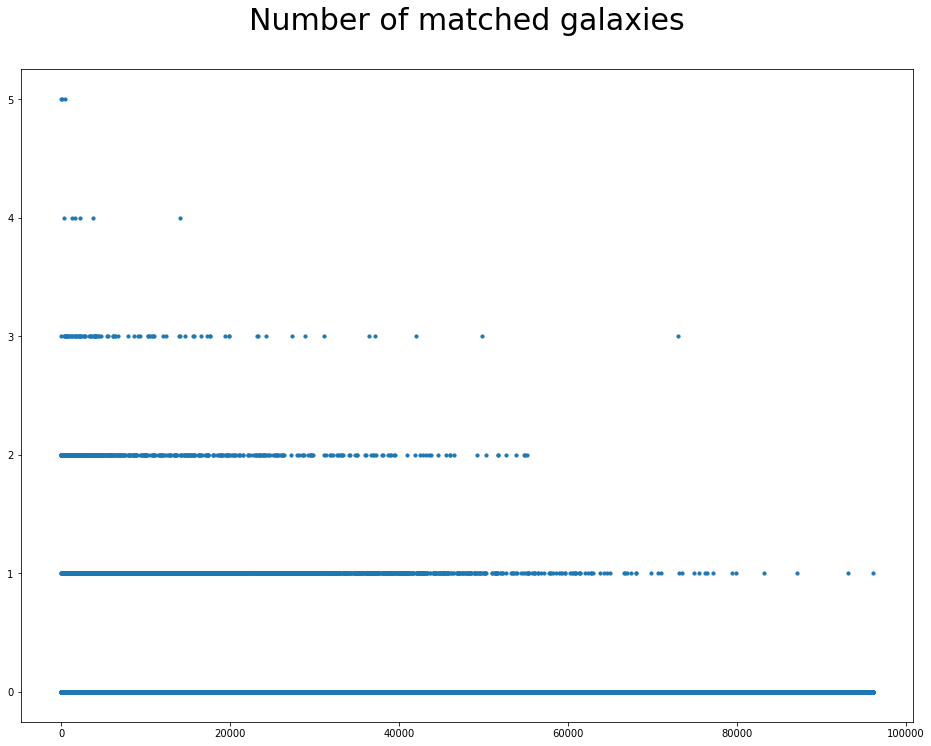

In [190]:
y=np.arange(len(num_matches))

fig = plt.figure(figsize=(16,12))
#fig.suptitle('number of matched galaxies', fontsize=16)
ax = fig.add_subplot(111)
ax.set_title("Number of matched galaxies\n",fontsize=30)
ax.scatter(y,num_matches,s=10)